# Models to predict Coronavirus spreading and infection of COVID-19 in different countries

Tomáš Kulhánek<sup>1,2</sup>, Jiří Kofránek<sup>1,2</sup>

<sup>1</sup>Department of Biocybernetics and Computer Aided Learning, Institute of Pathological Physiology, First Faculty of Medicine, Charles University in Prague <sup>2</sup>Creative Connections,s.r.o. 

This notebook is not official source of information, but use public data to compare several models to follow and predict spreading of Coronavirus and infection of COVID-19 in the world. Data are taken from public resources, see references bellow. The computation is scripted using Python and libaries supporting data science. This notebook is still in development and is being updated in daily/weekly basis for few weeks(March 2020). If you find any issue, report it or use PR.

This notebook is interactive, with text cells and code cells. It's possible to move using keybord arrows. In order to execute the code, you may need to do that in the order from top to bottom - Press `Shift-Enter`. Content of the cell is editable, thus you may change the content and rerun them by pressing `Shift-Enter`.

In [1]:
%%capture
%run Covid-19InItalyAndCzechia.ipynb

Now we define routines to obtain data from public databases. See References bellow

In [2]:
# in %run Covid-19InItalyAndCzechia.ipynb

## Logistic model
Logistic model may fit the spreading of some infection in population. See https://en.wikipedia.org/wiki/Logistic_regression

$$ f(x,a,b,c)= \frac{c}{1+e^\frac{-(x-b)}{a} } $$

* $x$ time
* $a$ speed of infection
* $b$ critical point, day when most infected people was recorded
* $c$ total number of infected people

In [3]:
#def logistic_model(x,a,b,c):
#    return c/(1+np.exp(-(x-b)/a))
# in %run Covid-19InItalyAndCzechia.ipynb

# Exponencial model
Exponencial model may better fit the uncontrollable spreading of infection in the beginning, when no action was taken.

$$ f(x,a,b,c)= a.e^{b(x-c)} $$

In [4]:
#def exponential_model(x,a,b,c):
#    return a*np.exp(b*(x-c))
# in %run Covid-19InItalyAndCzechia.ipynb

 # Model fit to data
 The models have parameters, these parameters might be estimated thus the real data fits the model. We use method of  `curve_fit` from scipy library `scipy`. 

In [5]:
#def fitexponentialmodel(x,y):
#    #fit data to exponential model
#    exp_fit = curve_fit(exponential_model,x,y,p0=[0.02,0.1,2.8])
#    return exp_fit
# in %run Covid-19InItalyAndCzechia.ipynb

# Vizualisation of results and prediction of models based on real data

Now we will define routines to visualize real data and model with parameters, we may extrapolate models to predict future. 

In [6]:
# in %run Covid-19InItalyAndCzechia.ipynb

# Data analysis 

We can define function with a sequence to obtain raw data, do fitting and visualize prediction

In [7]:
# in %run Covid-19InItalyAndCzechia.ipynb

# Model prediction for Czechia

Data are available from [3] and [2]. Comparing model prediction for both data.

Parameters of logistic model fit a: 3.701301906834423  b: 82.62245472490687  c: 2828.056424539916  errors of c: 243.95534270966905
Parameters of logistic model fit a: 4.264631154120136  b: 85.00000000000001  c: 3816.5859065639747  errors of c: 632.1707002194751


/home/vagrant/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


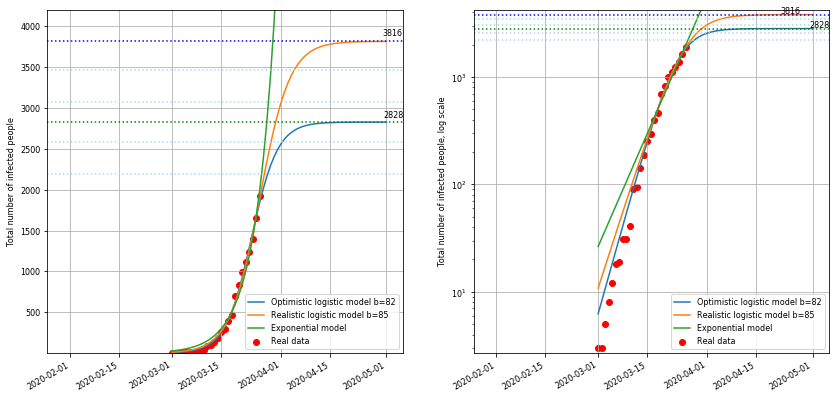

In [8]:
analyze_for_country('Czechia',estb=85) 


Parameters of logistic model fit a: 3.922908456731956  b: 83.9720039832457  c: 3117.402259921343  errors of c: 302.27658572982546
Parameters of logistic model fit a: 4.170981817718969  b: 85.00000000000001  c: 3536.8976546783715  errors of c: 440.7911236760159


/home/vagrant/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


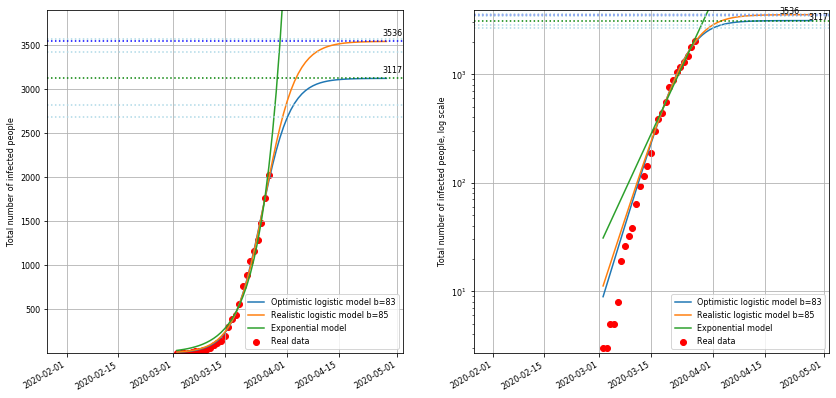

In [9]:
analyze_czechia(estb=85)

## Summary for Czechia
Model fitting is sensitive on real data [2],[3]. The prediction differs, however the order for realistic model seems to be same. The trajectories are still exponential and it seems that we're not behind critical point 'b'. Therefore we added manually estimated critical point b as 12 days after drastic arrangments were introduced by governemnt 13.3.2020. Which is day 85. (Incubation period of COVID-19 seems to be betwee 7 and 14 days)

We will see the future.

# Model and prediction for South Korea

Parameters of logistic model fit a: 3.370794198780859  b: 61.204147007249766  c: 8659.599299773658  errors of c: 56.57800725175938


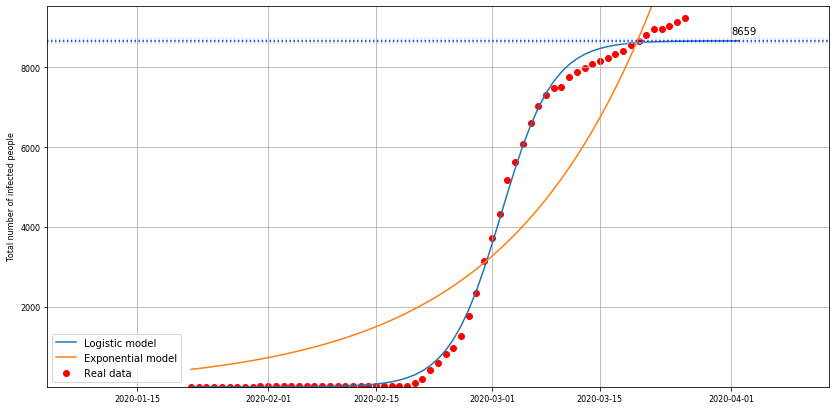

In [10]:
analyze_for_country('Korea, South')

## Summary for South Korea

From real data, South Korea seems to reach critical point at day around 60 (1/3/2020). Prediction of the logistic model fits and do not differ from daily updates.

* 13/3/2020 Predicted total 7982 (+- 38 ). 
* 16/3/2020 Predicted total 8097 (+-32). 
* 17/3/2020 Predicted total 8133 (+-31).


# Model and prediction for Italy

Data are available from WHO and from italian sources[1] [3]. 

Parameters of logistic model fit a: 5.0630023664401875  b: 80.84807223680167  c: 115177.90741059295  errors of c: 2204.8906081631567
Parameters of logistic model fit a: 5.108180117233125  b: 81.00000000000001  c: 116757.12262169855  errors of c: 2307.33248183241


/home/vagrant/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


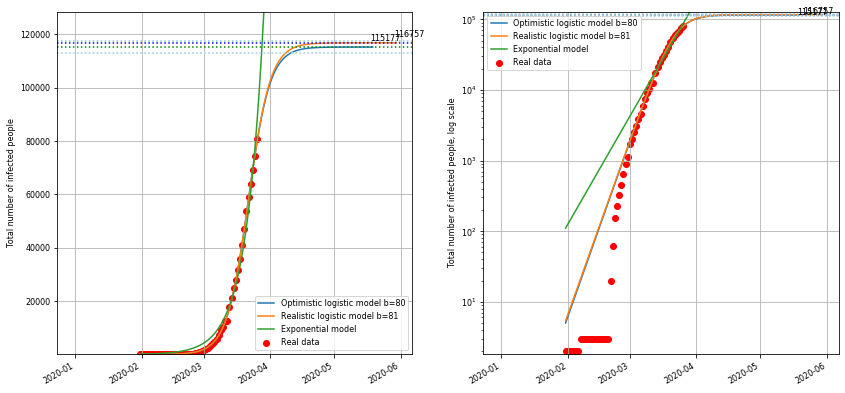

In [11]:
analyze_for_country('Italy',estb=81)

Parameters of logistic model fit a: 5.147389108229139  b: 80.98835146527728  c: 116673.00923449255  errors of c: 2506.8731807154786
Parameters of logistic model fit a: 5.150817362244149  b: 81.00000000000001  c: 116794.02286875798  errors of c: 2514.751773859313


/home/vagrant/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


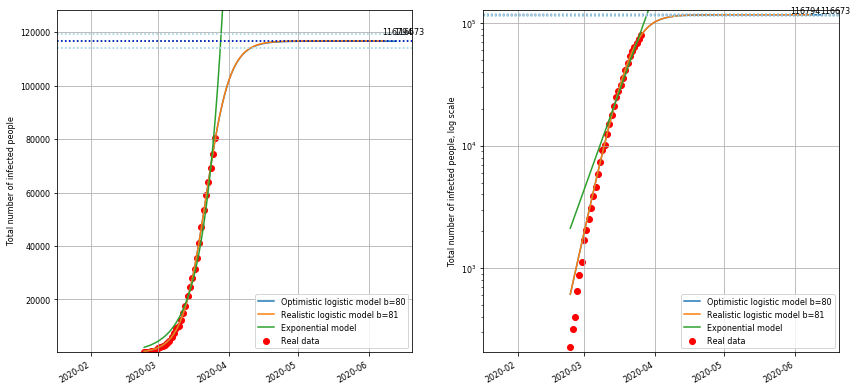

(datetime.datetime(2020, 6, 14, 0, 0),
 (array([5.14738911e+00, 8.09883515e+01, 1.16673009e+05]),
  array([[5.97144885e-03, 1.70117978e-02, 1.74929068e+02],
         [1.70117978e-02, 5.73243303e-02, 5.95014597e+02],
         [1.74929068e+02, 5.95014597e+02, 6.28441314e+06]])),
 [0.07727515029777757, 0.23942499933938588, 2506.8731807154786])

In [12]:
df3=getdatafromItaly()
analyze_data(df3,estb=81)

## Summary for Italy 
Models are sensitive on real data,[1] a [3], it slightly differs, however has same trends
* 13/3/2020 predicts 42393 (+-7887) vs 19293 (+-1111). 
* 16/3/2020 predicts 73519 (+-9427) vs 134252 (+-65720). 

We add estimated `b` as 12 days after drastic arrangements were taken in Italy (9/3/2020). b=81 (21/3/2020).
* 16/3/2020 Realistic model predicts predicts 128639 (+-41596).
* 17/3/2020 Realistic model predicts 123533 (+-34187).

# Other countries

In [13]:
# do analysis for your country, check correct country/region name in data source [3]
print(dfw[['Country/Region']])

            Country/Region
0              Afghanistan
1                  Albania
2                  Algeria
3                  Andorra
4                   Angola
..                     ...
243                   Mali
244  Saint Kitts and Nevis
245                 Canada
246                 Canada
247                 Kosovo

[248 rows x 1 columns]


Parameters of logistic model fit a: 3.8349270093482026  b: 82.80637729979436  c: 66397.12290010072  errors of c: 3006.1261630274266
Parameters of logistic model fit a: 5.101748057901443  b: 90.00000000000001  c: 164072.67454750583  errors of c: 48393.570234146595


/home/vagrant/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


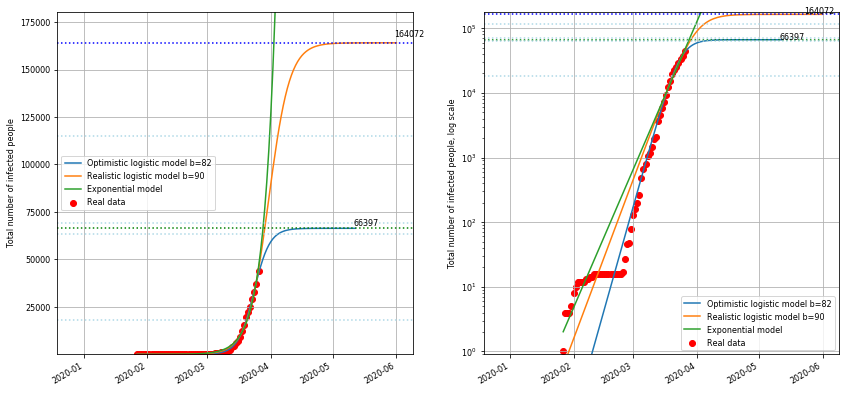

In [14]:
# replace country name 
analyze_for_country('Germany',estb=90)

# References
* [1] Gianluca Malato, Covid-19 infection in Italy. Mathematical models and predictions. Data from Italy https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d
* [2] Data from Czechia https://onemocneni-aktualne.mzcr.cz/covid-19
* [3] World data updated by Johns Hopkins University Center for Systems Science and Engineering https://github.com/CSSEGISandData/COVID-19